In [1047]:
import sys
import torch
import importlib
import numpy as np
import scipy
import matplotlib.pyplot as plt
from torch.autograd import grad  
import utils_wave  # Ensure you import the module itself, not specific items
importlib.reload(utils_wave)  # Reload the module to apply updates
from utils_wave import *

In [1048]:
N = 10

# Whether to use Fourier coefficients as targets in training
predict_fourier = False

# Create model for training
model = Model(N=N, K=5, num_iv=10, num_t=10, layer_sizes_branch=[40, 40, 40, 40], layer_sizes_trunk=[40, 40, 40], 
              conserve=False, predict_fourier=predict_fourier, lr=0.001)

# Train DeepONet
model.train(30_000)

Step 	 Train loss 	 Test loss
1000 	 [1.36e-02] 	 [5.35e-02]
2000 	 [4.16e-04] 	 [6.10e-02]
3000 	 [3.33e-04] 	 [4.95e-02]
4000 	 [2.96e-04] 	 [4.60e-02]
5000 	 [2.56e-04] 	 [4.52e-02]
6000 	 [2.45e-04] 	 [4.50e-02]
7000 	 [2.44e-04] 	 [4.50e-02]
8000 	 [2.36e-04] 	 [4.47e-02]
9000 	 [2.58e-04] 	 [4.50e-02]
10000 	 [2.35e-04] 	 [4.45e-02]
11000 	 [2.33e-04] 	 [4.45e-02]
12000 	 [2.33e-04] 	 [4.45e-02]
13000 	 [2.35e-04] 	 [4.44e-02]
14000 	 [2.33e-04] 	 [4.44e-02]
15000 	 [2.36e-04] 	 [4.45e-02]
16000 	 [2.33e-04] 	 [4.43e-02]
17000 	 [2.33e-04] 	 [4.43e-02]
18000 	 [2.32e-04] 	 [4.43e-02]
19000 	 [2.33e-04] 	 [4.42e-02]
20000 	 [2.34e-04] 	 [4.42e-02]
21000 	 [2.32e-04] 	 [4.42e-02]
22000 	 [2.33e-04] 	 [4.41e-02]
23000 	 [2.34e-04] 	 [4.41e-02]
24000 	 [2.32e-04] 	 [4.41e-02]
25000 	 [2.33e-04] 	 [4.41e-02]
26000 	 [2.32e-04] 	 [4.41e-02]
27000 	 [2.34e-04] 	 [4.41e-02]
28000 	 [2.33e-04] 	 [4.40e-02]
29000 	 [2.32e-04] 	 [4.40e-02]
30000 	 [2.32e-04] 	 [4.40e-02]


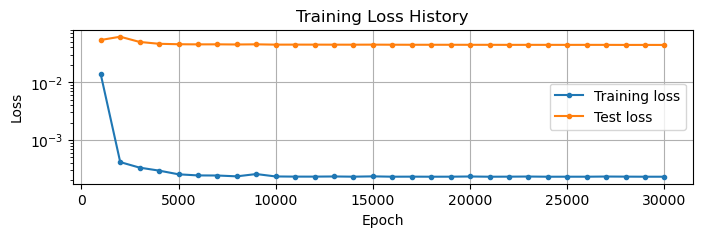

In [1049]:
# Loss history
model.plot_losshistory()

In [1050]:
# Function for plotting predictions vs analytical solutions
def plot_predictions(c, T): 

    # Paramaters
    c = np.array(c).astype(np.float32)
    t = np.array([T]).astype(np.float32)

    
    # Analytical solution generator
    def analytical_solution(c, t):
        x = np.linspace(0, 1, 2*model.N+1)[None, None, :]
        c, t = c[:, None, None], t[None, :, None]
        return model.f(x, c, t), x[0,0,:]
    
    
    ground_truth, x = analytical_solution(c, t)
    pred = model.predict(c, t)
    
    
    if predict_fourier:
        pred = np.fft.irfft(torch.view_as_complex(pred.detach()), n=2*model.N+1)
    
    
    # Plot prediction vs. solution
    _, ax = plt.subplots(figsize=(10, 4), dpi=150)

    ax.set_title(f'Prediction of KdV Solution Using a DeepONet (for $t=${T})')
    O, o = x[0], ground_truth[0,0,0]
    
    

    #ax.plot(x, ground_truth[l,0,:][0:], label=label, alpha=0.3, linewidth=5, c=f'C{l}')
    #ax.plot(O, o, c='k', alpha=0.3, linewidth=5, label='Actual solution')
    #ax.plot(O, o, '--', c='grey', label='Predicted solution')

    for l in range(ground_truth.shape[0]):
        label = 'c={:.1f}'.format(c[l])
        
        ax.plot(x, ground_truth[l,0,:][0:], label=label, alpha=0.5, linewidth=5, c=f'C{l}')
        ax.plot(x, pred[l,0,:].tolist()[0:], '--', c=f'C{l}')

        ax.legend()
        ax.grid(True)
    ax.set_ylabel(f"u(x,{T})")
    ax.set_xlabel("x")
    plt.show()

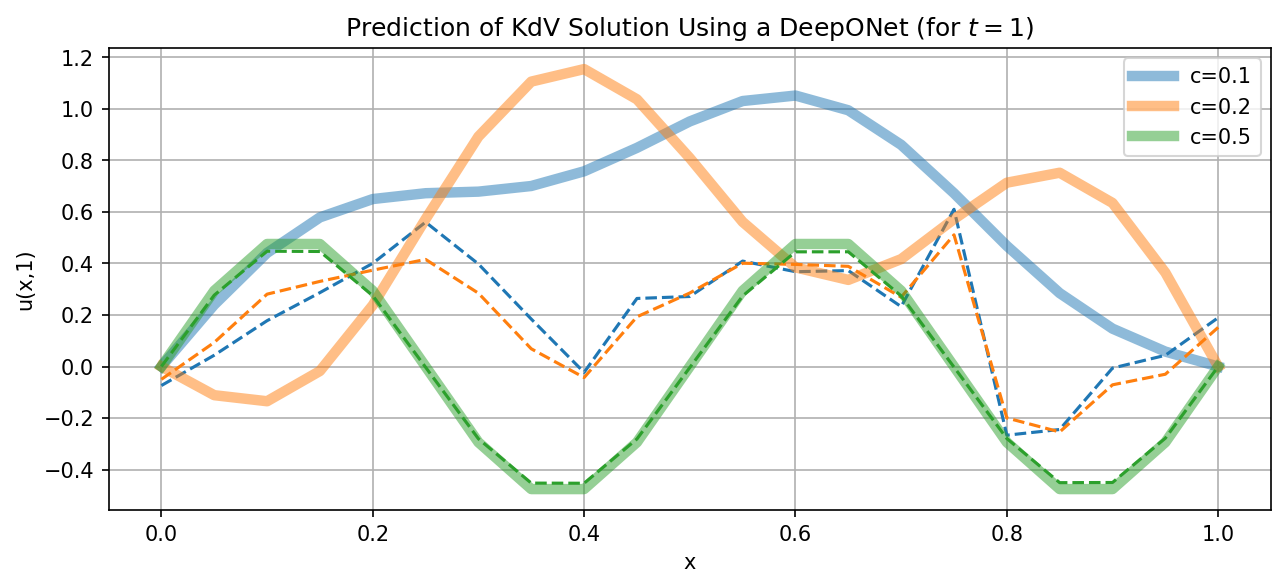

In [1051]:
# Plotting predictions vs analytical solutions
plot_predictions(c=[0.1,0.2,0.5], T=1)